# Analysis of K3 Tensor Scaling Laws

We analyze how the largest eigenvalue and infinity norm of the K3 tensor scale with respect to:
- Network depth (L)
- Network width (M) 
- Input dimension (D)
- Number of samples (N)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
PATH_TO_DATA = "/home/janis/STG3A/deeperorwider/experiments/data/large"
files = os.listdir(PATH_TO_DATA)
data = []

for f in files:
    if f.startswith("k3_analysis_"):
        d = np.load(os.path.join(PATH_TO_DATA, f), allow_pickle=True).item()
        data.append(d)

## Scaling Laws Analysis

In [3]:
def analyze_parameter_scaling(data, param_name, plot_size=(20, 15)):  # we increase figure size
    other_params = ['N', 'D_IN', 'M', 'L']
    other_params.remove(param_name)
    
    groups = {}
    for d in data:
        key = tuple(d[p] for p in other_params)
        if key not in groups:
            groups[key] = []
        max_eigenvalue = np.max(np.abs(d['mean_eigenvalues']))  # we get largest eigenvalue
        groups[key].append((d[param_name], d['inf_norm'], max_eigenvalue))
    
    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=plot_size)
    
    # Plot 1: Infinity Norm vs Parameter (Linear Scale)
    ax = axes[0,0]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[1] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
    ax.set_xlabel(param_name)
    ax.set_ylabel('Infinity Norm')
    ax.set_title(f'K3 Infinity Norm vs {param_name} (Linear)')
    ax.grid(True)
    
    # Plot 2: Infinity Norm vs Parameter (Log Scale)
    ax = axes[0,1]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[1] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
        
        if len(x) > 1:  # we fit power law if enough points
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            x_line = np.array(sorted(x))  # we use sorted x values for line
            ax.plot(x_line, np.exp(intercept) * x_line**slope, '--',
                    label=f'slope={slope:.2f}')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Infinity Norm')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f'K3 Infinity Norm vs {param_name} (Log)')
    ax.grid(True)
    
    # Plot 3: Largest Eigenvalue vs Parameter (Linear Scale)
    ax = axes[1,0]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[2] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
    ax.set_xlabel(param_name)
    ax.set_ylabel('Largest Eigenvalue')
    ax.set_title(f'K3 Largest Eigenvalue vs {param_name} (Linear)')
    ax.grid(True)
    
    
    ax = axes[1,1]
    for key, values in groups.items():
        sorted_values = sorted(values, key=lambda x: x[0])  # we sort by parameter value
        x = [v[0] for v in sorted_values]
        y = [v[2] for v in sorted_values]
        ax.scatter(x, y, label=str(key), s=100)  # we use scatter plot with larger markers
        
        if len(x) > 1:  # we fit power law if enough points
            slope, intercept, r_value, p_value, std_err = linregress(np.log(x), np.log(y))
            x_line = np.array(sorted(x))  # we use sorted x values for line
            ax.plot(x_line, np.exp(intercept) * x_line**slope, '--',
                    label=f'slope={slope:.2f}')
    ax.set_xlabel(param_name)
    ax.set_ylabel('Largest Eigenvalue')
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.set_title(f'K3 Largest Eigenvalue vs {param_name} (Log)')
    ax.grid(True)
    
    
    handles, labels = axes[1,1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))
    
    plt.tight_layout()
    plt.show()

Analyzing depth (L) scaling relationships...


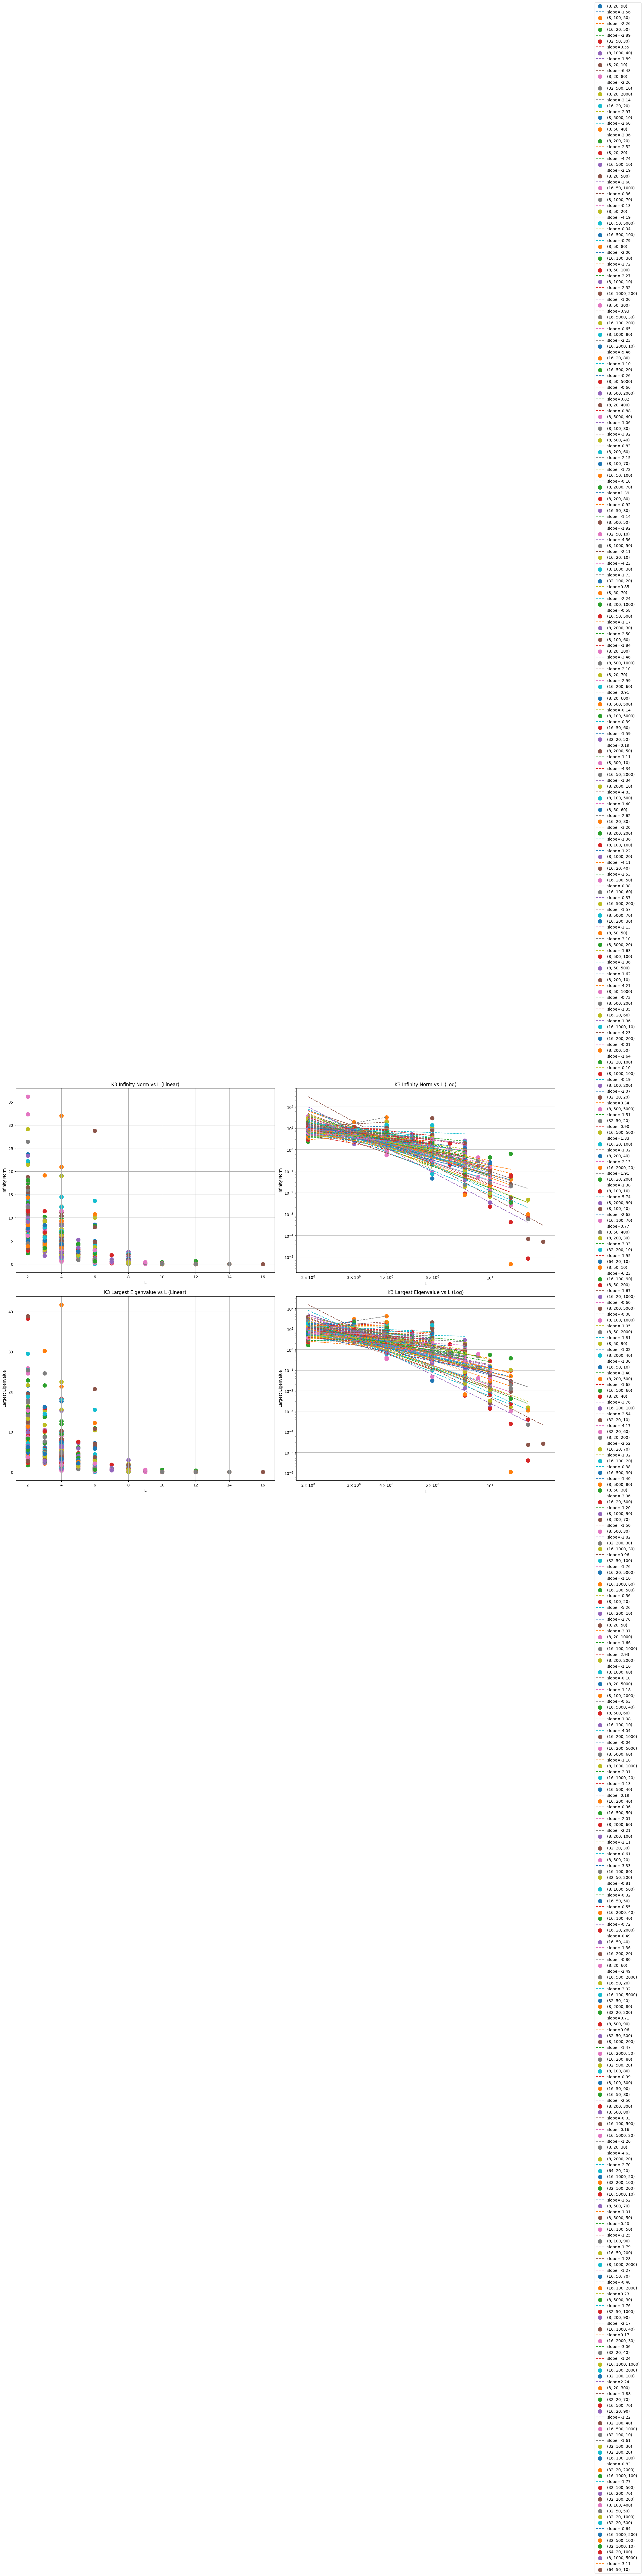

In [4]:

print("Analyzing depth (L) scaling relationships...")
analyze_parameter_scaling(data, 'L')

Analyzing width (M) scaling relationships...


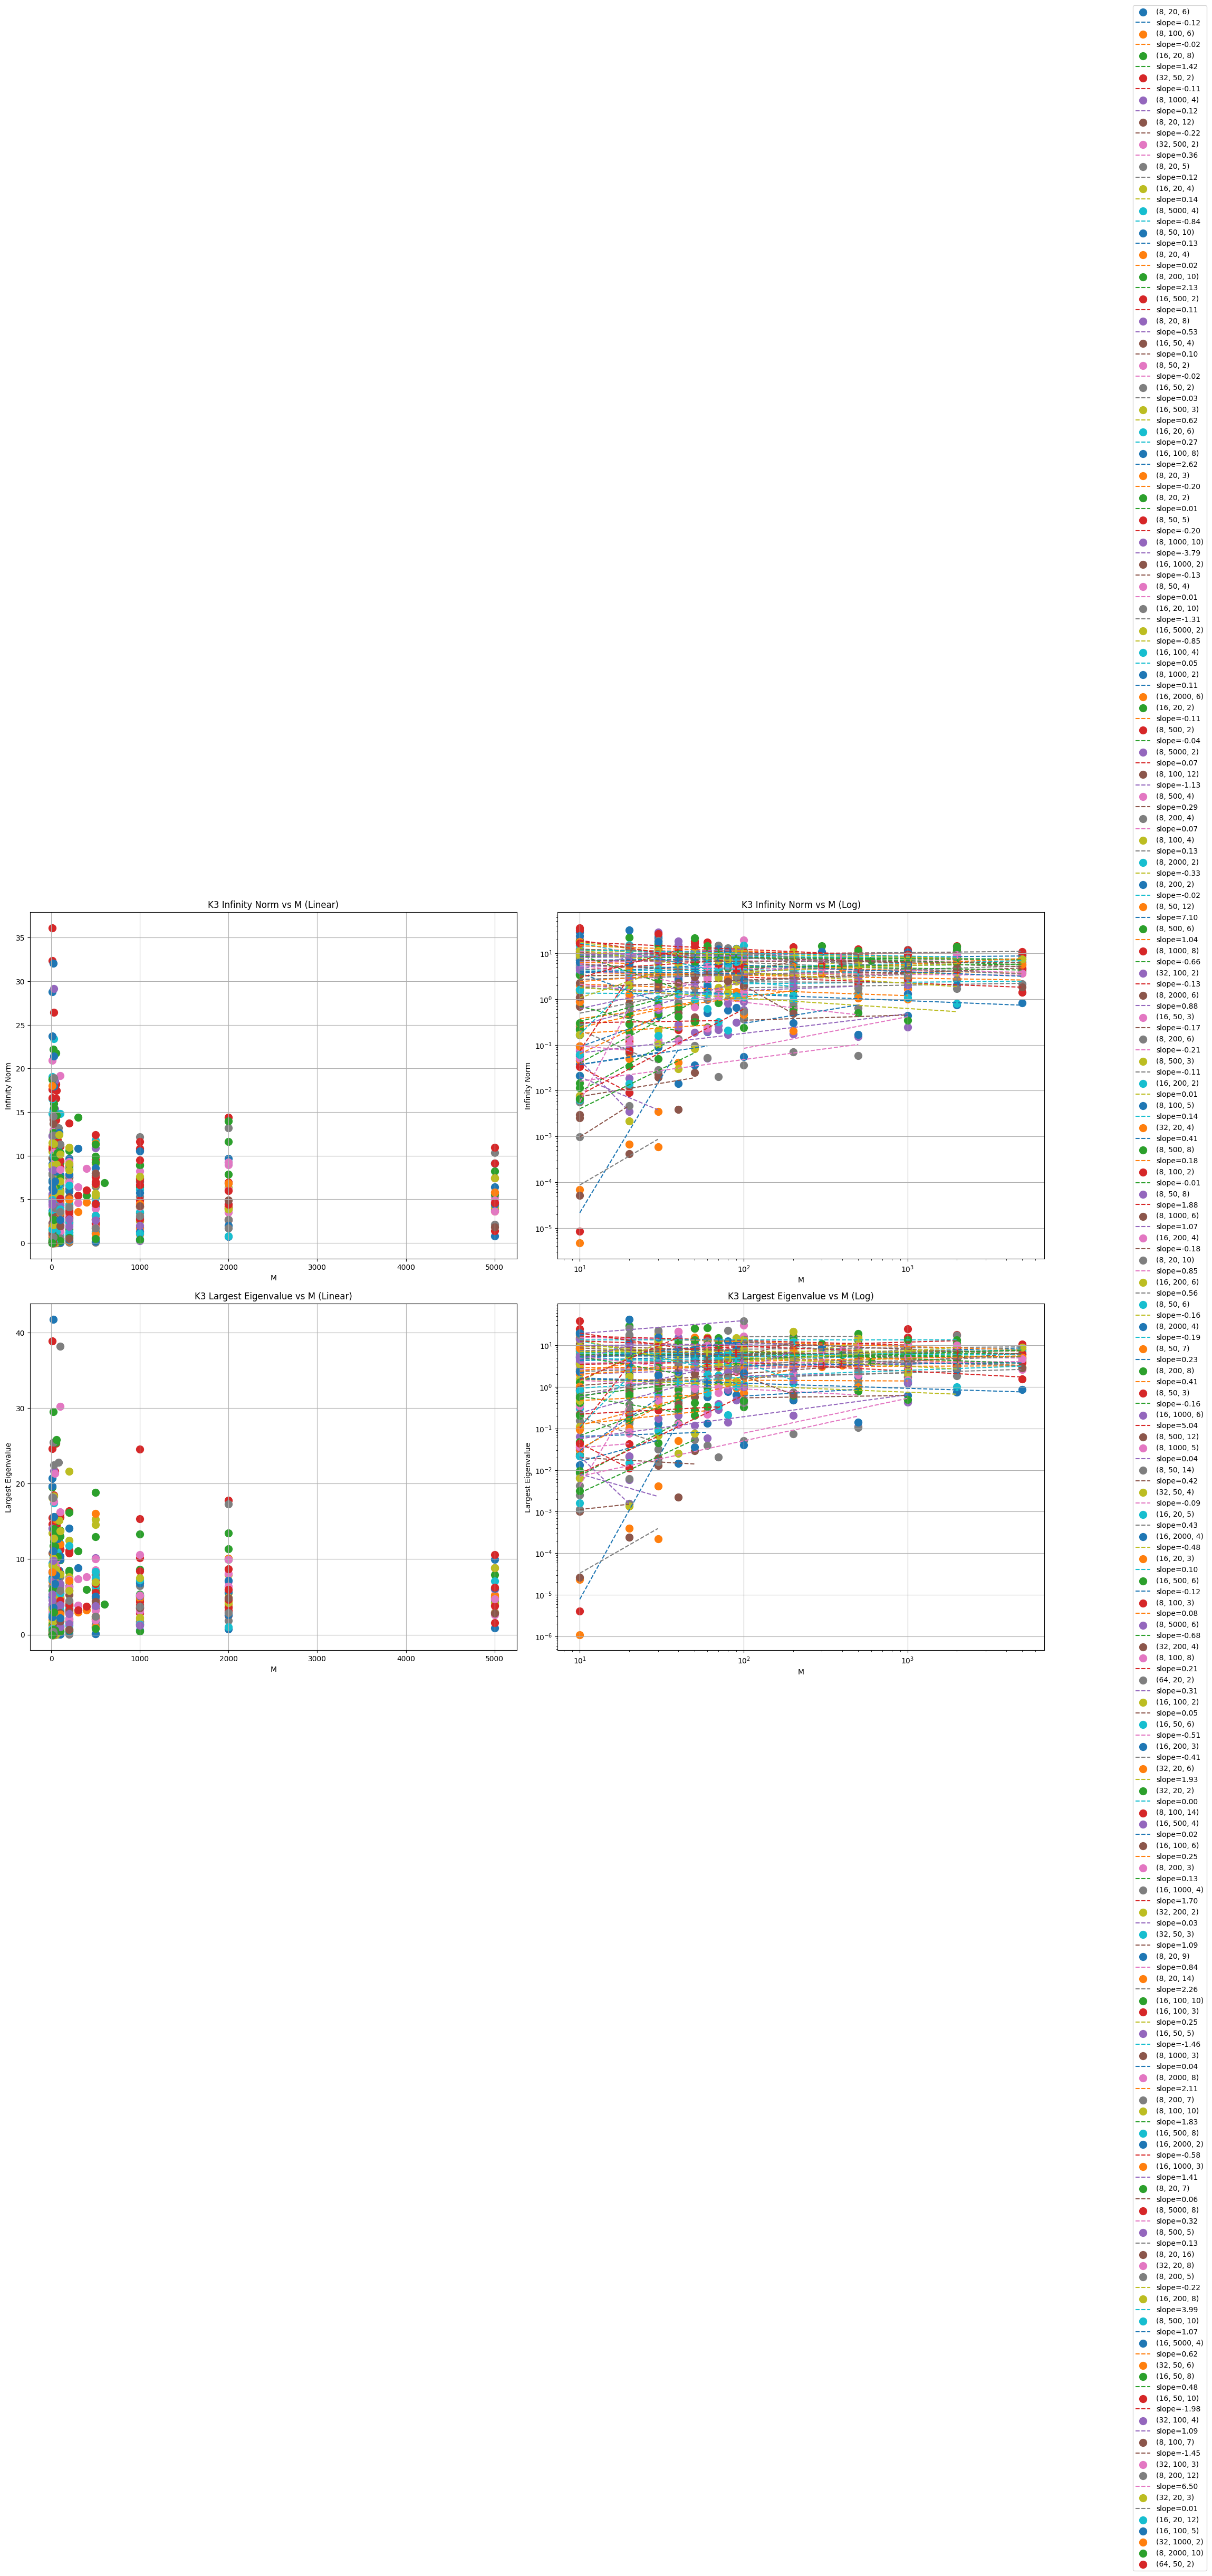

In [5]:

print("Analyzing width (M) scaling relationships...")
analyze_parameter_scaling(data, 'M')

Analyzing input dimension (D_IN) scaling relationships...


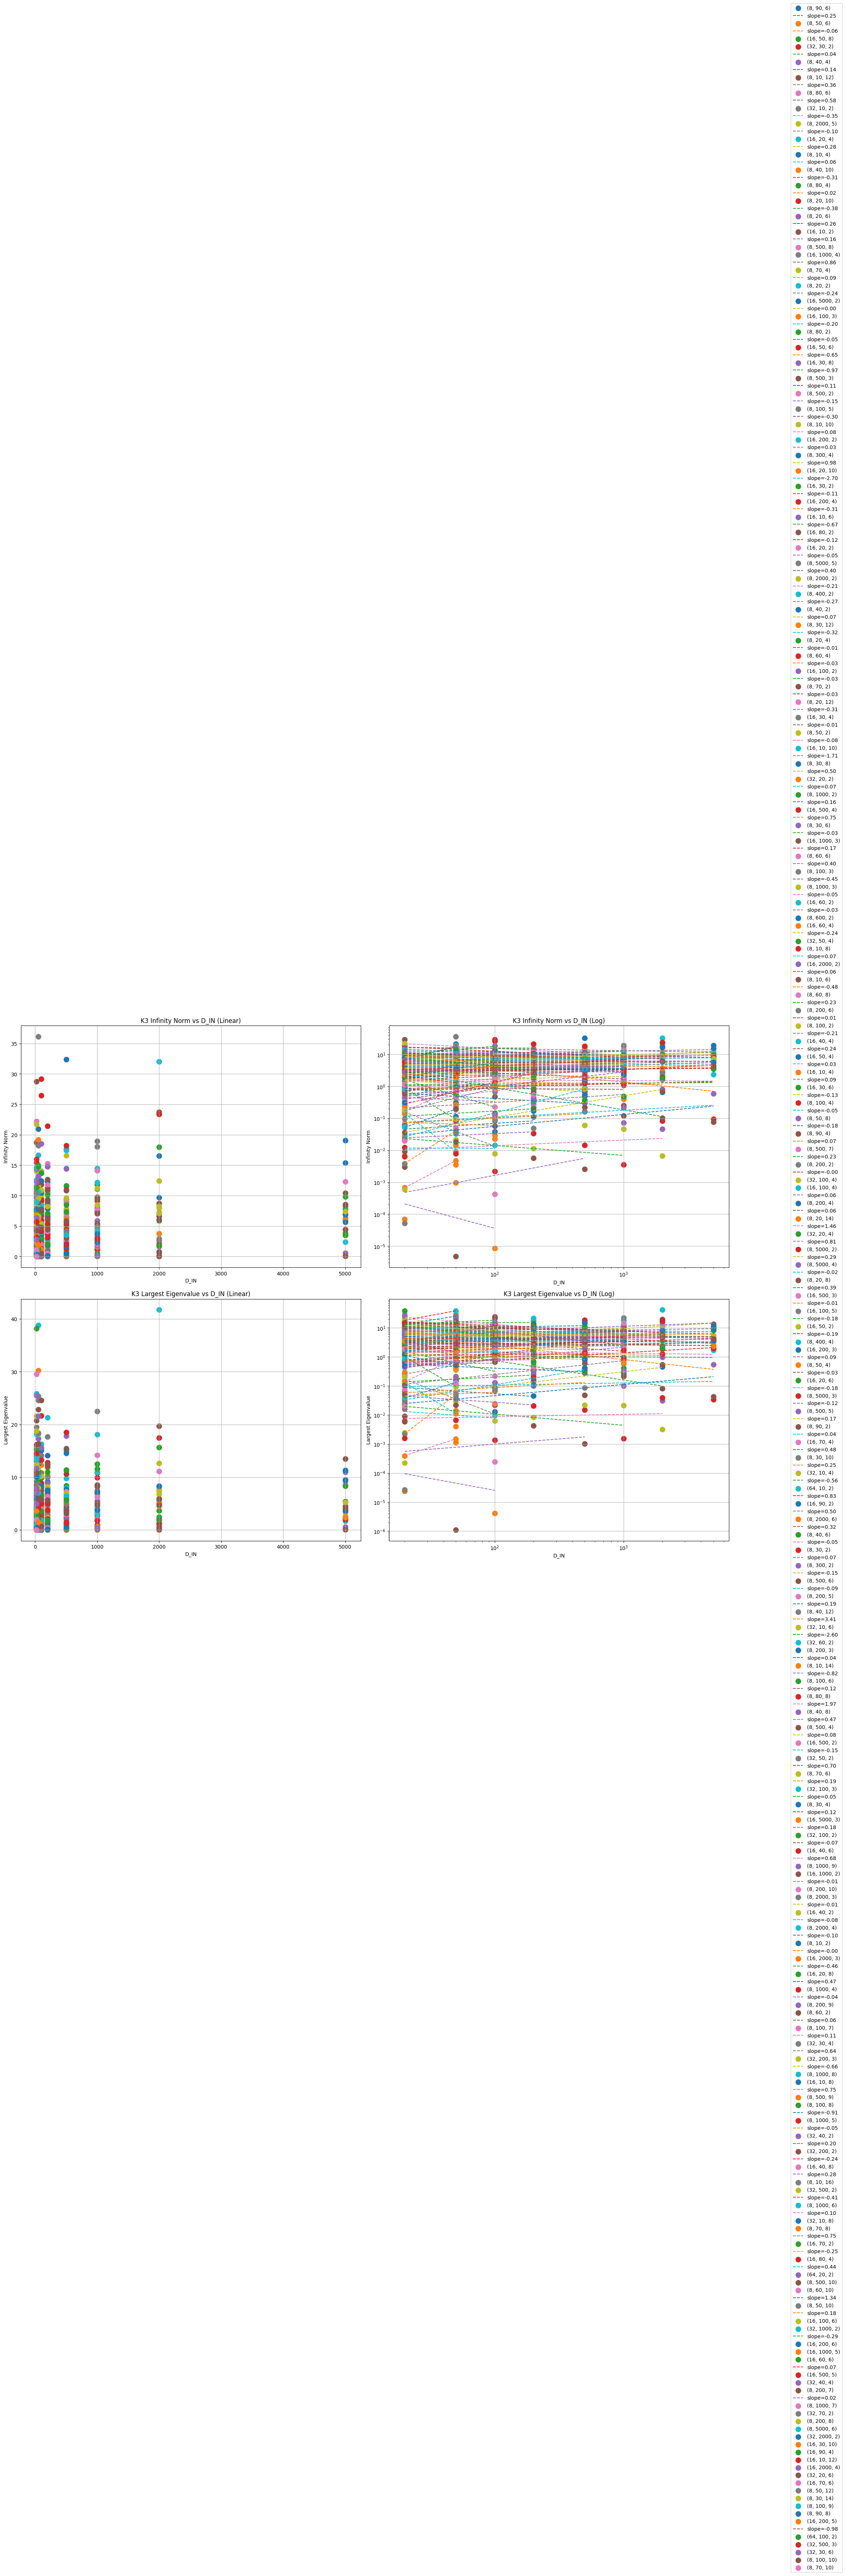

In [6]:
# Analyze input dimension scaling
print("Analyzing input dimension (D_IN) scaling relationships...")
analyze_parameter_scaling(data, 'D_IN')

Analyzing sample size (N) scaling relationships...


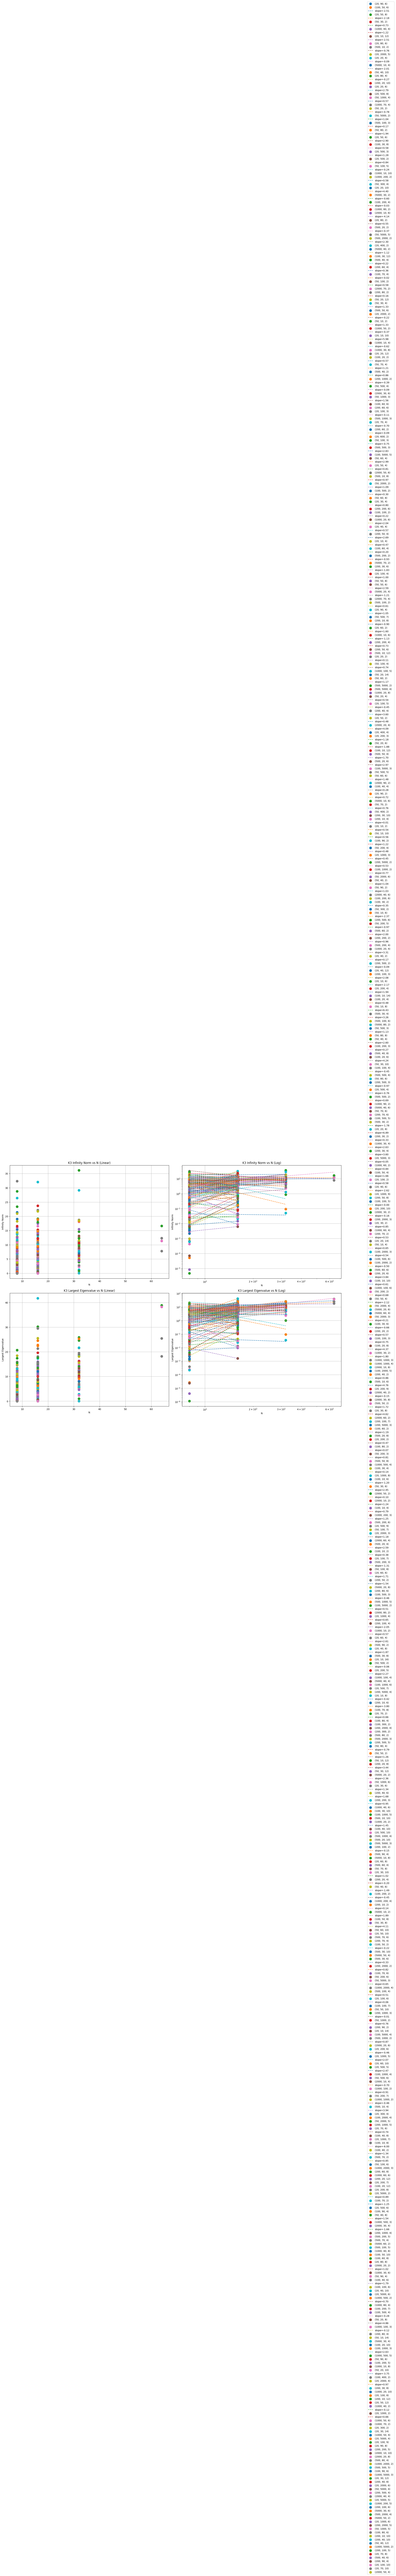

In [7]:

print("Analyzing sample size (N) scaling relationships...")
analyze_parameter_scaling(data, 'N')

## Multivariate Regression Analysis

In [8]:

X = np.array([[d['N'], d['D_IN'], d['M'], d['L']] for d in data])  # we extract features
y_inf = np.array([d['inf_norm'] for d in data])  # we extract infinity norm
y_eig = np.array([np.max(np.abs(d['mean_eigenvalues'])) for d in data])  # we extract max eigenvalue


X_log = np.log(X)
y_inf_log = np.log(y_inf)
y_eig_log = np.log(y_eig)


scaler = StandardScaler()
X_log_scaled = scaler.fit_transform(X_log)


reg_inf = LinearRegression().fit(X_log_scaled, y_inf_log)
reg_eig = LinearRegression().fit(X_log_scaled, y_eig_log)



print("\nMultivariate Regression Results:")
print("\nInfinity Norm Scaling:")
print(f"R² score: {reg_inf.score(X_log_scaled, y_inf_log):.3f}")
print("Coefficients (log-log scale):")
for name, coef in zip(['N', 'D_IN', 'M', 'L'], reg_inf.coef_):
    print(f"{name}: {coef:.3f}")

print("\nLargest Eigenvalue Scaling:")
print(f"R² score: {reg_eig.score(X_log_scaled, y_eig_log):.3f}")
print("Coefficients (log-log scale):")
for name, coef in zip(['N', 'D_IN', 'M', 'L'], reg_eig.coef_):
    print(f"{name}: {coef:.3f}")


Multivariate Regression Results:

Infinity Norm Scaling:
R² score: 0.659
Coefficients (log-log scale):
N: 0.170
D_IN: 0.137
M: 0.200
L: -1.520

Largest Eigenvalue Scaling:
R² score: 0.618
Coefficients (log-log scale):
N: 0.332
D_IN: 0.101
M: 0.318
L: -1.435


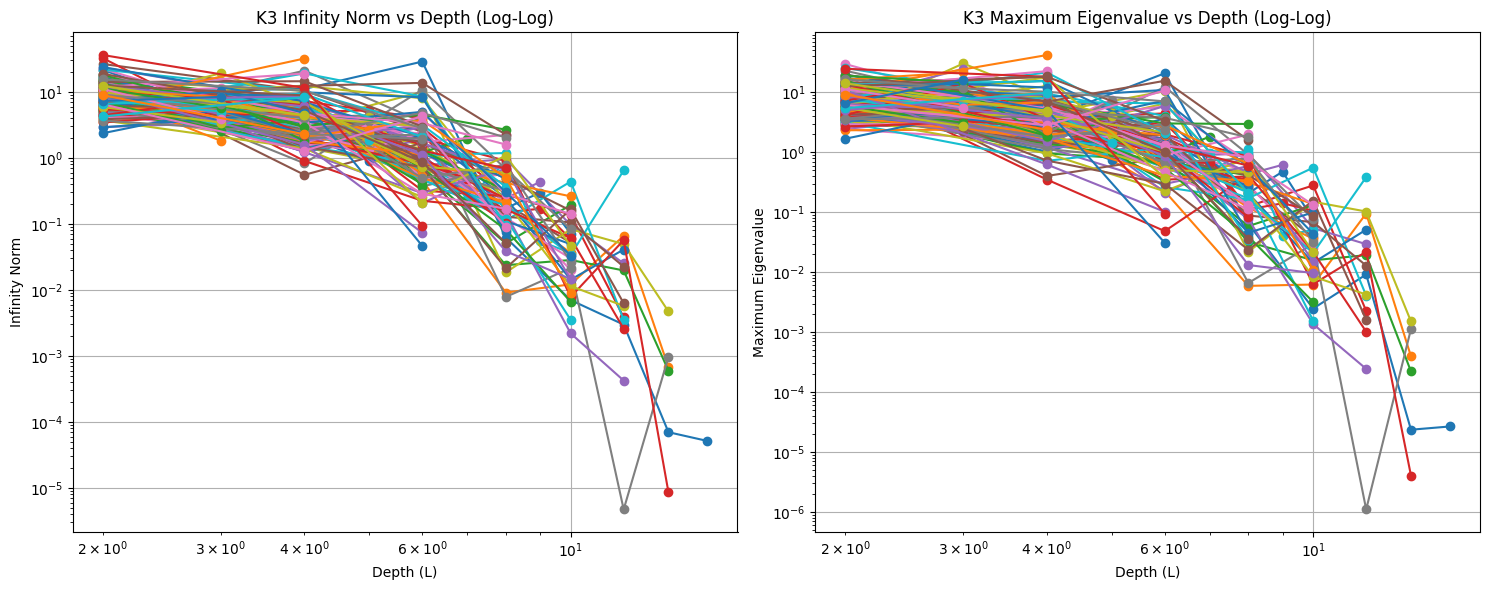


Average scaling laws with respect to depth L:
Infinity Norm ~ L^-1.88
Maximum Eigenvalue ~ L^-1.60


In [9]:
# Filter data to get unique values of other parameters
other_params = ['N', 'D_IN', 'M']
unique_params = {}
for param in other_params:
    unique_params[param] = sorted(list(set(d[param] for d in data)))

# Create arrays for L values and corresponding norms/eigenvalues
L_data = []
inf_norm_data = []
max_eig_data = []

# Group by other parameters and collect L scaling data
for N in unique_params['N']:
    for D in unique_params['D_IN']:
        for M in unique_params['M']:
            points = [d for d in data if d['N']==N and d['D_IN']==D and d['M']==M]
            if points:  # we check if we have data for this parameter combination
                points = sorted(points, key=lambda x: x['L'])  # we sort by L
                L_values = [p['L'] for p in points]
                inf_norms = [p['inf_norm'] for p in points]
                max_eigs = [np.max(np.abs(p['mean_eigenvalues'])) for p in points]
                
                # Fit power law
                if len(L_values) > 1:  # we need at least 2 points for regression
                    slope_inf, _, _, _, _ = linregress(np.log(L_values), np.log(inf_norms))
                    slope_eig, _, _, _, _ = linregress(np.log(L_values), np.log(max_eigs))
                    
                    L_data.append(L_values)
                    inf_norm_data.append((inf_norms, slope_inf))
                    max_eig_data.append((max_eigs, slope_eig))

# Plot results
plt.figure(figsize=(15, 6))

# Plot infinity norm scaling
plt.subplot(121)
for i in range(len(L_data)):
    L = np.array(L_data[i])
    norms, slope = inf_norm_data[i]
    plt.loglog(L, norms, 'o-', label=f'slope={slope:.2f}')
plt.xlabel('Depth (L)')
plt.ylabel('Infinity Norm')
plt.title('K3 Infinity Norm vs Depth (Log-Log)')
plt.grid(True)

# Plot max eigenvalue scaling
plt.subplot(122)
for i in range(len(L_data)):
    L = np.array(L_data[i])
    eigs, slope = max_eig_data[i]
    plt.loglog(L, eigs, 'o-', label=f'slope={slope:.2f}')
plt.xlabel('Depth (L)')
plt.ylabel('Maximum Eigenvalue')
plt.title('K3 Maximum Eigenvalue vs Depth (Log-Log)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Print average slopes
avg_slope_inf = np.mean([slope for _, slope in inf_norm_data])
avg_slope_eig = np.mean([slope for _, slope in max_eig_data])

print("\nAverage scaling laws with respect to depth L:")
print(f"Infinity Norm ~ L^{avg_slope_inf:.2f}")
print(f"Maximum Eigenvalue ~ L^{avg_slope_eig:.2f}")

